In [10]:
import pandas as pd
import numpy as np
from sklearn.linear_model import ElasticNetCV, LogisticRegressionCV
from sklearn.metrics import accuracy_score

df_reviews = pd.read_csv('../data/movie_reviews.csv')

X = df_reviews.filter(regex='_sc$')
y = df_reviews['rating_good']

In [4]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
heart_disease = fetch_ucirepo(id=45)

# data (as pandas dataframes)
X = heart_disease.data.features
y = heart_disease.data.targets

# metadata
# print(heart_disease.metadata)

# variable information
# print(heart_disease.variables)

df_heart = (
    X
    .assign(
        cp = pd.Categorical(X.cp).rename_categories(['typical', 'atypical', 'non-anginal', 'asymptomatic']),
        fbs = pd.Categorical(X.fbs).rename_categories(['<= 120 mg/dl', '> 120 mg/dl']),
        restecg = pd.Categorical(X.restecg).rename_categories(['normal', 'ST-T wave abnormality', 'left ventricular hypertrophy']),
        exang = pd.Categorical(X.exang).rename_categories(['no', 'yes']),
        slope = pd.Categorical(X.slope).rename_categories(['upsloping', 'flat', 'downsloping']),
        # ca = pd.Categorical(X.ca, categories = ['0', '1', '2', '3']),
        thal = pd.Categorical(X.thal).rename_categories(['normal', 'fixed defect', 'reversible defect']),
        heart_disease = pd.Categorical(y.num > 0).rename_categories(['no', 'yes'])
    )
    .rename(
        columns={
            'sex': 'male',
            'cp': 'chest_pain_type',
            'trestbps': 'resting_bp',
            'chol': 'cholesterol',
            'fbs': 'fasting_blood_sugar',
            'restecg': 'resting_ecg',
            'thalach': 'max_heart_rate',
            'exang': 'exercise_induced_angina',
            'oldpeak': 'st_depression',
            'ca': 'num_major_vessels',
            'thal': 'thalassemia',
        }
    )
    .assign(
        fasting_blood_sugar_num=lambda x: x.fasting_blood_sugar.cat.codes,
        resting_ecg_num=lambda x: x.resting_ecg.cat.codes,
        exercise_induced_angina_num=lambda x: x.exercise_induced_angina.cat.codes,
        heart_disease_num=lambda x: x.heart_disease.cat.codes,
    )
)

df_heart.head()

ModuleNotFoundError: No module named 'ucimlrepo'

In [5]:
pd.Categorical(y.num)#.rename_categories(['typical', 'atypical', 'non-anginal', 'asymptomatic'])

AttributeError: 'Series' object has no attribute 'num'

In [11]:
# Fit model

model = LogisticRegressionCV(
  penalty   = 'elasticnet', 
  l1_ratios = np.arange(.0, 1, .05), 
  cv     = 5, 
  solver = 'saga', 
  random_state = 123,
  verbose = False
)

model.fit(X, y)

# Predict

y_pred = model.predict(X)

# Evaluate

print(
  'Training accuracy: ', accuracy_score(y, y_pred),
  'Baseline Prevalence: ', np.mean(y)
)

Training accuracy:  0.68 Baseline Prevalence:  0.563


In [16]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X = df_reviews.filter(regex="_sc$")
y = df_reviews["rating_good"]

# split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.25, 
    random_state=42
)

# define the parameter values for GridSearchCV
param_grid = {
    'C': [0.1, 1, 2, 5, 10, 20],
}

# perform k-fold cross-validation to select the best penalty parameter
# Note that LogisticRegression by default is ridge regression for scikit-learn
grid_search = GridSearchCV(
    LogisticRegression(), 
    param_grid=param_grid, 
    cv=5, 
    scoring='accuracy'
  ).fit(X_train, y_train)

best_param = grid_search.best_params_['C']

# apply the best model to the test set and calculate accuracy
best_model = grid_search.best_estimator_ # if you want to inspect
acc_train = grid_search.score(X_train, y_train)
acc_test = grid_search.score(X_test, y_test)

In [17]:
acc_train, acc_test, best_param

(0.6613333333333333, 0.692, 2)

In [18]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# create pipeline
pipeline = make_pipeline(
    SimpleImputer(strategy='mean'),
    StandardScaler(),
    LogisticRegressionCV(penalty='l2', Cs=[1], cv=5, max_iter=1000),
)

# fit the pipeline
pipeline.fit(X_train, y_train)

# assess the pipeline
y_pred = pipeline.predict(X_test)
accuracy_score(y_test, y_pred)

# save the pipeline
# from joblib import dump, load
# dump(pipeline, 'pipeline.joblib')

0.692

## Vis/Interpretation

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

df_heart = pd.read_csv('data/heart_disease_processed.csv')
df_heart_num = pd.read_csv('data/heart_disease_processed_numeric_sc.csv')

# convert appropriate features to categorical
for col in df_heart.select_dtypes(include='object').columns:
    df_heart[col] = df_heart[col].astype('category')

X = df_heart_num.drop(columns=['heart_disease']).to_numpy()
y = df_heart_num['heart_disease'].to_numpy()

# for LogisticRegression, which can't automatically handle missing data
y_complete = df_heart_num.dropna()['heart_disease'].to_numpy().astype(int)
X_complete = df_heart_num.dropna().drop(columns='heart_disease').to_numpy()

X_train, X_test, y_train, y_test = train_test_split(
    df_heart.drop(columns='heart_disease'), df_heart_num['heart_disease'], test_size=0.2, random_state=42
)

FileNotFoundError: [Errno 2] No such file or directory: 'data/heart_disease_processed.csv'

In [8]:
import joblib

cv_boost_tune = joblib.load('ml/data/tune-boost-py-model.pkl')


FileNotFoundError: [Errno 2] No such file or directory: 'ml/data/tune-boost-py-model.pkl'

['age',
 'male',
 'chest_pain_type',
 'resting_bp',
 'cholesterol',
 'fasting_blood_sugar',
 'resting_ecg',
 'max_heart_rate',
 'exercise_induced_angina',
 'st_depression',
 'slope',
 'num_major_vessels',
 'thalassemia']

In [65]:
# Get feature importances
feature_importances = pd.DataFrame({'Feature': cv_boost_tune.feature_name_,
                                   'Importance': cv_boost_tune.feature_importances_})

# Sort the dataframe by importance in descending order
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Print the dataframe
print(feature_importances)


                    Feature  Importance
4               cholesterol         949
7            max_heart_rate         903
0                       age         859
9             st_depression         694
3                resting_bp         611
11        num_major_vessels         369
12              thalassemia         342
10                    slope         250
1                      male         235
6               resting_ecg         226
8   exercise_induced_angina         191
5       fasting_blood_sugar          79
2           chest_pain_type           5


PyALE._ALE_generic:INFO: Continuous feature detected.


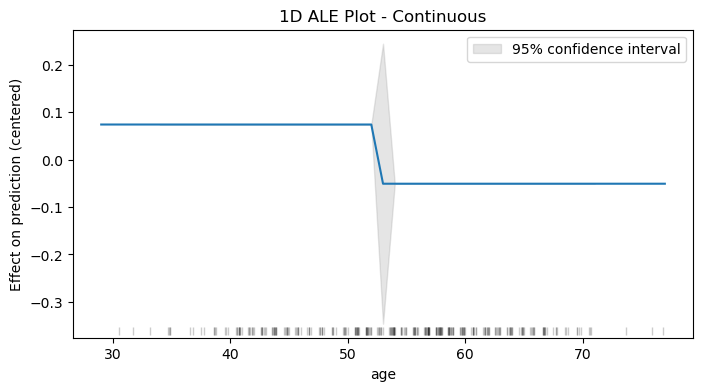

In [66]:
from PyALE import ale

ale_eff = ale(
    X=df_heart.drop(columns='heart_disease'), 
    model=cv_boost_tune, feature=["age"], 
    grid_size=3000, 
    # include_CI=True
)

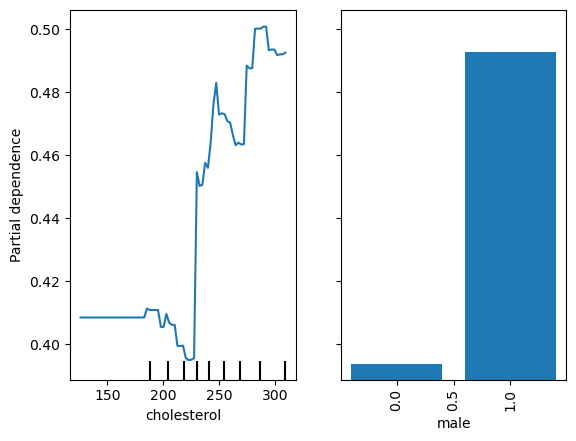

In [67]:
import pandas as pd
import numpy as np
from sklearn.inspection import PartialDependenceDisplay

PartialDependenceDisplay.from_estimator(
    cv_boost_tune, 
    df_heart.drop(columns='heart_disease'), 
    features=['cholesterol', 'male'], 
    categorical_features=['male'], 
    percentiles=(0, .9),
    grid_resolution=75
)
